## Bosonic Quantum Hall system

The classical action is 
$$
S[\theta,\vec{p},\vec{J}] = \frac{\lambda_1}{2} \sum_{r}[\vec{\omega}(r) - 2\pi \vec{p}(r)]^2 
+ \frac{1}{2 \lambda_2} \sum_{R}[\vec{J}(R) - (\vec{\nabla} \times \vec{p})(R)]^2
$$
where $\omega_{\mu} = \theta(r+\mu) - \theta(r)$ and $r,R$ are the coordinates of direct and corresponding dual lattices repectively.

In [3]:
using IterTools

In [50]:
addprocs(40)
@everywhere include("bootstrap.jl")

In [78]:
L=4
sim_dict=Dict("lambda1"=>.1
            ,"lambda2"=>.1
            ,"lambda3"=>0.6
            ,"inter"=>1
            ,"delta_theta"=>pi*.5
            ,"seed"=>5
            ,"L"=>4
           ,"num_of_thermal"=>1000000
           ,"num_of_measure"=>10000
           ,"num_of_sweeps"=>4
            ,"num_of_relative_sweeps"=>10)
params=[]
lamb=linspace(0.0,100.,13)
L = 1:20
for (l,lm) in product(L,lamb)
    c_sim_dict=copy(sim_dict)
    c_sim_dict["lambda2"]=lm
    c_sim_dict["L"]=l
    push!(params,c_sim_dict)
end
println(params[1]["lambda2"])

0.1


In [3]:
using JLD
data= load("save/test.jld")
res= data["res"]
res[1]["meas"]["Real Hall Conductivity"]

10000-element Array{Complex{Float64},1}:
 -3.30398e-34-8.44481e-35im
 -3.80826e-34-1.61485e-34im
 -3.80826e-34-1.61485e-34im
 -3.80826e-34-1.61485e-34im
  -0.00981748-0.00981748im 
  -0.00981748-0.00981748im 
  -0.00981748-0.00981748im 
  -0.00981748-0.00981748im 
  -0.00981748-0.00981748im 
  -0.00981748-0.00981748im 
  -0.00981748-0.00981748im 
    -0.019635-0.019635im   
    -0.019635-0.019635im   
             ⋮             
   -0.0981748-0.0981748im  
   -0.0981748-0.0981748im  
   -0.0981748-0.0981748im  
    -0.166897-0.166897im   
    -0.166897-0.166897im   
   -0.0981748-0.0981748im  
   -0.0883573-0.0883573im  
   -0.0981748-0.0981748im  
   -0.0981748-0.0981748im  
   -0.0981748-0.0981748im  
   -0.0981748-0.0981748im  
   -0.0981748-0.0981748im  

In [5]:
using IterTools
using PyPlot
sort!(res,by=x->x["params"].L)
lamb = [2*n for n in 2:16]
figure()
imaginary = []
for i in groupby(x -> x["params"].L,res)
    c_L=i[1]["params"].L
    jj=[imag(mean(r["meas"]["Real Hall Conductivity"]*exp(im*pi/c_L)))*c_L for r in i]
    push!(imaginary,jj)
end
plot(lamb,imaginary,label = "Imaginary part")
legend()
title("Imaginary hall conductivity")

figure()
real_part =[]
for i in groupby(x -> x["params"].L,res)
    c_L=i[1]["params"].L
    jj=[real(mean(r["meas"]["Real Hall Conductivity"]*exp(im*pi/c_L)))*c_L for r in i]
    push!(real_part,jj)
end
plot(lamb,real_part,label = "$Real part")
legend()
title("Real hall conductivity")


LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, kw)) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension, but have shapes (15L,) and (1L, 20L)',)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\pyplot.py", line 3317, in plot
    ret = ax.plot(*args, **kwargs)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\__init__.py", line 1897, in inner
    return func(ax, *args, **kwargs)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_axes.py", line 1406, in plot
    for line in self._get_lines(*args, **kwargs):
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 407, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 385, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 244, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))
[39m

In [7]:
using IterTools
using PyPlot
sort!(res,by=x->x["params"].L)
figure()
for i in groupby(x -> x["params"].L,res)
    c_L=i[1]["params"].L
    jj=[imag(mean(r["meas"]["Real Hall Conductivity"]*exp(im*pi/c_L)))*c_L for r in i]
    plot(lamb,jj,label = "$(i[1]["params"].L)")
end
legend()
title("Imaginary hall conductivity")

figure()
for i in groupby(x -> x["params"].L,res)
    c_L=i[1]["params"].L
    jj=[real(mean(r["meas"]["Real Hall Conductivity"]*exp(im*pi/c_L)))*c_L for r in i]
    plot(lamb,jj,label = "$(i[1]["params"].L)")
end
legend()
title("Real hall conductivity")


LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, kw)) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension, but have shapes (15L,) and (1L,)',)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\pyplot.py", line 3317, in plot
    ret = ax.plot(*args, **kwargs)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\__init__.py", line 1897, in inner
    return func(ax, *args, **kwargs)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_axes.py", line 1406, in plot
    for line in self._get_lines(*args, **kwargs):
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 407, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 385, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 244, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))
[39m

In [9]:
#Pkg.build("GR")
#using Plots
using PyPlot
#plotly()
sort!(res,by=x->x["params"].L)
fig,ax=PyPlot.subplots()
for i in groupby(x -> x["params"].L,res)
    c_L=i[1]["params"].L
    jj=[imag(mean(r["meas"]["Real Hall Conductivity"]))*c_L for r in i]
    ax[:plot](lamb,jj,label=i[1]["params"].L)
end
ax[:legend](loc="best", fontsize=15)

LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, kw)) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension, but have shapes (15L,) and (1L,)',)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\__init__.py", line 1897, in inner
    return func(ax, *args, **kwargs)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_axes.py", line 1406, in plot
    for line in self._get_lines(*args, **kwargs):
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 407, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 385, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "C:\Users\p_5_2\.julia\v0.6\Conda\deps\usr\lib\site-packages\matplotlib\axes\_base.py", line 244, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))
[39m

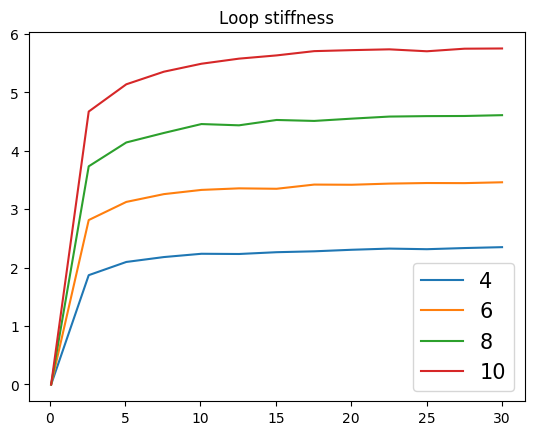

PyObject <matplotlib.text.Text object at 0x0000000051060BA8>

In [80]:
#Pkg.build("GR")
#using Plots
using PyPlot
#plotly()
sort!(res,by=x->x["params"].L)
fig,ax=PyPlot.subplots()
for i in groupby(x -> x["params"].L,res)
    c_L=i[1]["params"].L
    jj=[real(mean(r["meas"]["Stiffness Loop"])) for r in i]
    ax[:plot](lamb,jj,label=i[1]["params"].L)
end
ax[:legend](loc="best", fontsize=15)
title("Loop stiffness")

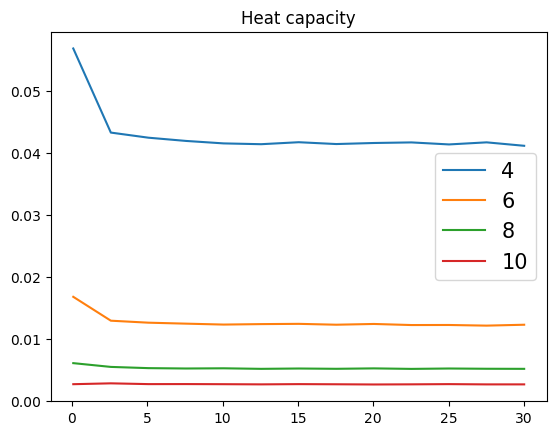

PyObject <matplotlib.text.Text object at 0x0000000038448BA8>

In [81]:
using PyPlot
#plotly()
sort!(res,by=x->x["params"].L)
fig,ax=PyPlot.subplots()
for i in groupby(x -> x["params"].L,res)
    c_L=i[1]["params"].L
    jj=[var(r["meas"]["Energy List"]) for r in i]
    ax[:plot](lamb,jj,label=i[1]["params"].L)
end
ax[:legend](loc="best", fontsize=15)
title("Heat capacity")

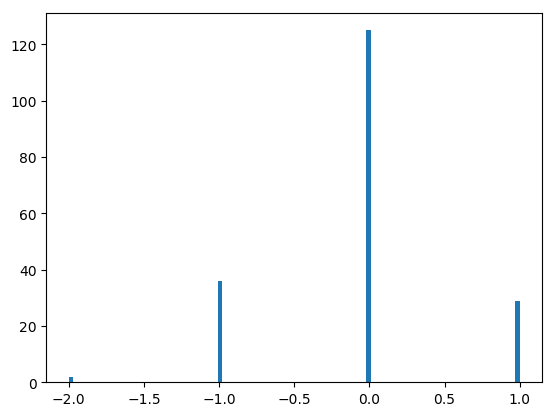

list = [0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -2, 0, 0, 1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 1, -1, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 1, 0, 0, 0, -2, 0, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 1, 0, -1, -1, 0, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, -1, 1, 0, 1, 1, 0, 0, -1, 1, 1, 1, 0, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 1, 1, 0, -1, -1, 0, -1, 1, -1, 1, -1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, -1, 0, 0, 1, 0, 0, -1, 0, 1, -1, -1, 0, 0, 0, -1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0]


([2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.0], [-2.0, -1.97, -1.94, -1.91, -1.88, -1.85, -1.82, -1.79, -1.76, -1.73  …  0.73, 0.76, 0.79, 0.82, 0.85, 0.88, 0.91, 0.94, 0.97, 1.0], Any[PyObject <matplotlib.patches.Rectangle object at 0x0000000027556390>, PyObject <matplotlib.patches.Rectangle object at 0x0000000027556940>, PyObject <matplotlib.patches.Rectangle object at 0x0000000027556EF0>, PyObject <matplotlib.patches.Rectangle object at 0x000000002756FA20>, PyObject <matplotlib.patches.Rectangle object at 0x000000002756FF60>, PyObject <matplotlib.patches.Rectangle object at 0x000000002756FA90>, PyObject <matplotlib.patches.Rectangle object at 0x0000000027565630>, PyObject <matplotlib.patches.Rectangle object at 0x0000000027565BE0>, PyObject <matplotlib.patches.Rectangle object at 0x000000002754F1D0>, PyObject <matplotlib.patches.Rectangle object at 0x000000002754F780>  …  PyObject <matplotlib.patches.Rectangle object at 0x00

In [26]:
list = reshape(sim.lat.p_lattice,length(sim.lat.p_lattice))
@show list
figure()
plt[:hist](list,100)

In [12]:
@show sim.lat.angle/pi

sim.lat.angle / pi = [0.458696 -0.41789 0.00743789 0.151903; 0.233582 -0.322933 -0.283375 -0.587271; -0.638978 0.185328 0.600458 -0.428451; 0.999324 0.958872 -0.0939011 -0.248586]

[0.38347 -0.936867 -0.859938 -0.515773; 0.0320293 0.989206 0.442994 -0.740016; 0.417602 -0.137575 -0.270499 -0.733334; -0.861298 -0.610891 -0.864641 -0.149427]

[-0.44021 -0.485645 0.917041 0.916151; 0.588468 0.595662 -0.686398 -0.000630865; -0.755955 0.935497 0.514238 -0.960963; -0.237244 -0.491081 0.27014 0.825412]

[0.13759 0.837457 -0.134577 -0.510371; 0.170962 0.489211 0.723384 0.0911771; 0.275199 0.863339 0.528726 -0.400943; -0.471706 0.495437 -0.601856 -0.429281]


4×4×4 Array{Float64,3}:
[:, :, 1] =
  0.458696  -0.41789    0.00743789   0.151903
  0.233582  -0.322933  -0.283375    -0.587271
 -0.638978   0.185328   0.600458    -0.428451
  0.999324   0.958872  -0.0939011   -0.248586

[:, :, 2] =
  0.38347    -0.936867  -0.859938  -0.515773
  0.0320293   0.989206   0.442994  -0.740016
  0.417602   -0.137575  -0.270499  -0.733334
 -0.861298   -0.610891  -0.864641  -0.149427

[:, :, 3] =
 -0.44021   -0.485645   0.917041   0.916151   
  0.588468   0.595662  -0.686398  -0.000630865
 -0.755955   0.935497   0.514238  -0.960963   
 -0.237244  -0.491081   0.27014    0.825412   

[:, :, 4] =
  0.13759   0.837457  -0.134577  -0.510371 
  0.170962  0.489211   0.723384   0.0911771
  0.275199  0.863339   0.528726  -0.400943 
 -0.471706  0.495437  -0.601856  -0.429281 

In [14]:
@show time

time = 185.264971161


185.264971161

In [8]:
a = rand(3)
@time b = a[1:2]

  0.000010 seconds (6 allocations: 288 bytes)


2-element Array{Float64,1}:
 0.164184
 0.243209

In [10]:
a = (1,2,3,4)
b = a[1:2]

(1, 2)